# Power Quality Classification using Muti Layer Perceptron (Dataset 1)

This notebook focusses on developing a Multi Layer perceptron which classifies a particular power signal into its respective power quality condition. The dataset used here contains signals which belong to one of the 5 classes(power quality condition). The sampling rate of this data is 128. This means that each signal is characterized by 128 data points. Here the signals provided are in time domain.

The power quality condition with respect to the output class value is as follows: <br>
1 - Normal<br>
2 - 3rd harmonic wave<br>
3 - 5th harmonic wave<br>
4 - Voltage dip<br>
5 - transient<br>

In [1]:
#importing the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from scipy.io import loadmat
from scipy.fft import fft,fftfreq
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

In [14]:
data_dict = loadmat('../data.mat')
print(data_dict.keys())
x=np.array(data_dict['SignalsDataBase'][0][0][1])
y=list()
y.append(data_dict['SignalsDataBase'][0][0][0][0])
n=len(data_dict['SignalsDataBase'][0])
for i in range(1,n):
    x=np.append(x,data_dict['SignalsDataBase'][0][i][1],axis=0)
    y.append(data_dict['SignalsDataBase'][0][i][0][0])
    

dict_keys(['__header__', '__version__', '__globals__', 'SignalsDataBase'])


In [15]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
y=label_encoder.fit_transform(y) 
print(len(y))
print(x.shape)

7680
(7680, 640)


### Data transformation

The data transformation steps employed here are as follows:<br>

1) Fourier Transform<br>
2) Normalization


In [16]:
#here we are overwritting the dataframe with the waves which we obtained after doing fourier transformation
'''n = x.shape[0]
s=0
for i in range(0,n):
    sig = fft(x[i][:])
    n = len(sig)
    for i in range(0,n):
        print(sig[i])
        s+=sig[i].imag
        break
        mag = np.abs(sig[i])
        phase =  math.atan(sig[i].imag/sig[i].real)
        sig[i] = np.linalg.norm([[mag,phase]],'fro')
        
print(s)'''

"n = x.shape[0]\ns=0\nfor i in range(0,n):\n    sig = fft(x[i][:])\n    n = len(sig)\n    for i in range(0,n):\n        print(sig[i])\n        s+=sig[i].imag\n        break\n        mag = np.abs(sig[i])\n        phase =  math.atan(sig[i].imag/sig[i].real)\n        sig[i] = np.linalg.norm([[mag,phase]],'fro')\n        \nprint(s)"

In [17]:
n = x.shape[0]
for i in range(0,n):
    ffT = fft(x[i][:])
    mag = np.abs(ffT)
    angle = np.angle(ffT, deg=True)
    for j in range(0,640):
        x[i][j] = angle[j]
    print(max(x[i]))

179.9253695327965
179.60679945185598
179.75611445181502
179.63792417360045
179.87404539408215
179.97886885759294
180.0
179.9999999999858
178.70323627534464
179.21624442294976
179.52956963237182
133.7932245685448
180.0
179.94460457265336
179.9785554959235
178.55569954030875
177.75034115174108
179.7371442882371
179.05525204843372
179.75885495418567
179.90925276891528
179.5602290085523
178.41619015609749
180.0
178.94506663087316
179.9839993475627
179.50115660648754
179.423242834031
179.50932917844526
179.6839519700809
178.87333918794374
179.87478114814957
179.2414800600619
179.64472505269038
179.68769394291505
179.93040134852026
179.10388796701108
178.95157036778065
179.5466717851841
119.56769744212366
180.0
179.38849451470355
179.6576204106554
179.6234926368318
179.38979664692738
179.870868801238
178.79811955686304
179.43066702602002
179.7024426405707
179.06145438771705
178.9855079887136
179.78588586632466
179.99999999998673
179.59940511423773
179.0478381597227
179.95334524727573
179.854

170.61352109577308
179.45203407603532
179.99999999999895
179.7850005449429
179.71428698281406
179.23474784246778
178.77672867056063
179.57825042911165
179.66635353636298
115.40917469893182
179.68390497062012
179.9807974374061
179.2787516340068
178.0529628268752
100.25524794086478
179.80995337553153
179.96220910567425
179.73631513383327
179.99999999999997
179.91022412507957
178.87499999999883
179.73500487361372
179.605352004744
179.79352715612765
179.76212649935536
179.7547052549606
179.9398400236135
179.1346563906357
179.92064399424825
178.82885827011071
179.41785584647232
178.87864545579114
179.8582233374486
179.04973811571242
179.7096905398807
179.20227136176564
179.8086307515705
178.8414032054186
179.99687615457017
179.62520788174885
179.92242403680032
179.20779768261
179.23456632684034
178.55506764450172
178.87118000819757
179.92779671846188
179.72582341867275
179.70885192365776
178.84402929052416
179.68675109030403
180.0
179.06044859026892
179.14879474452368
179.83595980565073
178

180.0
179.82763413181942
179.98814695819394
149.95700279759558
133.65622324348445
179.96687447983976
179.8948825863083
180.0
179.46547983576647
179.91539911817168
179.04359378268305
179.99999999999986
179.98964402730854
180.0
178.803385925967
179.63041401686868
179.42093637421445
178.82443651059128
179.70965193243134
179.65699783831866
179.95328356899068
179.91752991687858
178.77687236837778
179.61924055358554
178.85986176034766
179.85247159361464
178.2806639425061
178.8580038799343
125.61603327981229
179.64867739780377
179.49743404963934
178.61316522589502
179.15995706700642
179.66571372918307
179.99051341770843
179.0644428519339
179.44006904519395
180.0
179.23027762965074
179.73614168556264
179.675328311554
179.8237813351641
97.84537178984482
179.74802041807507
179.61223600206017
179.90289094550508
178.79789631287298
180.0
179.28983370147986
179.316302622856
178.8749999999666
179.99999999999974
179.175253552223
179.66312950243994
180.0
179.8748792227426
175.05227734669117
115.1516198

179.171010245977
179.5989576790756
179.31207420540562
178.63388821726446
179.91678046173885
179.2482254193612
179.90317295985088
178.43371660334225
93.13098334136369
178.5098075863179
171.74346685976806
179.03512780947958
178.9040238223382
179.53943462846118
180.0
179.99999999999997
178.85642537983625
179.92424559215186
118.21632948346564
179.06269269195604
179.93933402488517
179.63864412315306
179.59324842482934
178.81188768548182
178.95736070519084
179.7472407741197
179.89724367102028
179.96110233521435
179.48893980522107
179.75035933587117
178.9376639439503
179.75057591684808
179.6748258025452
179.64601775815765
179.43357110809927
179.84258310064
179.99905365576504
178.16450055431545
179.25881103821635
94.22199072734776
179.16317049164334
179.87926094024624
179.6154254422467
179.9957331434822
179.45826262048246
178.6484330680438
180.0
179.98461466268085
180.0
179.8826000543264
178.94940238474305
179.73623164886473
179.59800571768073
179.9763391187376
179.33731275708834
178.898286853

179.45195619095938
161.03159467184193
179.86640784592603
179.3877018487294
180.0
179.6316823637455
177.64776455333583
179.9834342564211
179.74593780781203
179.5917565662252
179.62229326925086
179.7350313800529
176.67109662243917
180.0
178.27012670527762
179.93318664309095
179.6837269523006
179.75115249306452
111.15793411770031
175.41123970650278
179.92805239286525
179.89451291668834
179.4240021158541
180.0
179.90883260622925
179.70926391920878
179.77533669149318
178.77399885072097
179.81396140779214
179.84525015086754
180.0
179.63069016639267
179.8482530761773
179.63446373940823
179.77373788725504
179.97886885758814
180.0
179.08596658478854
179.99999999999986
179.45102026172606
179.93917967012555
179.84315696874248
179.8147207679541
179.78194523093387
179.65875816453328
178.527307497149
179.73091047808154
179.81766524930347
179.58213881222704
179.52369673824353
179.99564101161283
179.94012482391258
179.55313932794752
179.77891918969826
170.25416630243703
146.24018899151184
179.50992841

179.57600994223964
179.5940920576719
179.1991160247493
179.95146469093726
179.9623313318738
144.6721765735377
180.0
180.0
179.95636248103148
179.83581442025647
179.36845420456126
179.30413318296928
179.10947532816593
179.0481136093352
179.80837072087124
165.62877077731562
179.99999999999966
179.56215927492542
179.87376096601452
177.06596462099142
179.14870572541938
179.419932798504
179.92866807958504
179.55020815711157
178.76515210390212
179.44783535339243
179.88548570712967
179.65284532851553
179.8198283046159
179.01199362070722
180.0
178.56523347889828
179.5202557626605
179.33829898151055
180.0
146.7798842134262
180.0
179.69602671688608
179.3132002966875
179.29140144773817
179.53665304264263
179.5301018235634
178.75696678823078
179.99999999999815
178.8312865391969
179.1618677925485
179.79045497107413
179.54196526113483
179.5756473206223
179.93245561731908
179.94893938009352
179.1306198921539
179.94991695948295
179.59801841116297
179.89555956946012
179.3518828299511
180.0
179.63501794

179.9957717204672
179.0497381157108
178.44701842329007
180.0
179.6726216728662
179.69128541666942
179.35032016565862
179.5919713593566
180.0
178.6497414427469
179.86060678371877
179.65666395793363
180.0
179.94415868146237
179.8294027636698
179.99999999999974
121.86478586891053
179.47731317394192
178.98635449017175
179.76011380679333
161.4702915231144
179.43066702602096
179.6177084270813
179.71056002122606
179.62666158337896
179.77799005000816
179.59635905551715
179.88260005432716
179.99999999999972
179.86838281669424
179.79116005246178
179.2931291077471
179.97603842646615
179.54723363424566
180.0
107.71296747754366
179.88933373975573
178.82677901321154
180.0
179.30336671138167
179.9866897545513
179.98872093104237
180.0
177.2026513271875
176.30562559202664
157.69313114350567
179.25257383819567
179.8628365216732
179.63144964754946
179.70872227209102
179.43513032721788
179.88959916500187
180.0
179.1384246842419
179.0573791702035
178.73111669470504
179.4770964403751
179.62420102979254
179.

179.9119343794946
178.9227166752924
179.39446050571408
179.38699052714037
179.56788346520975
179.11619307698686
179.20618624766655
178.53513467202535
142.68651379166377
179.97922297899626
179.1910434744997
179.48385486959523
170.26465058038016
178.91565727421775
146.20687532414115
179.59322235412932
179.2414800600616
179.02305740905487
179.99999999999974
179.7780711458441
179.8758155036436
179.99999999999963
180.0
179.8412869977476
179.89130582451887
144.34008053314275
179.61205587360436
179.8125069472737
177.20295055152957
179.99999999999952
171.97116735889884
179.86366580218038
179.38179638195146
179.86621086981157
179.99996520627485
179.9999999999999
179.95595453387295
150.75562468050762
179.7797925487037
179.8680192691653
179.6079391022646
179.03134096419646
179.99999999999972
179.8453708116847
178.74527455463772
178.8458757855221
179.96181050951964
179.9515678410609
179.11156798862888
179.8257184340563
179.4211168690874
178.95343857037213
179.94341871667464
179.9146384880213
179.9

178.60632135616527
179.42206843969856
178.77618682655682
179.98265583400357
179.32509980131803
179.11725193165404
179.5616657554842
178.7954888216944
179.7935271561507
179.81328186906106
179.62617215615384
179.65012586940773
179.44787192158304
179.99999999999937
179.20175106629364
179.4159964312498
179.99999999999974
179.48551663176917
179.9999999999999
179.84711859334408
178.96238146681375
180.0
115.01753953218541
179.36669174532423
179.0033355645655
179.6262535600219
91.14665627200026
179.51224575337102
178.87118000819757
179.0711970646634
178.85168444536055
180.0
179.94963463690573
179.78256248079384
179.116810757093
152.37528765899702
179.98212349004214
179.99999999999974
178.82885827011071
179.74101384563642
156.02048927143213
179.4618437863468
146.67736614323118
179.45293610983973
180.0
179.93701499306226
179.94376857350053
178.9850104374885
179.78840554718994
179.65439426542991
179.99999999999946
179.5249234317936
179.96269756470014
179.5240270001197
179.53179933659416
179.81151

179.81314574095305
179.61878703999554
179.63893534554177
179.74080860084138
179.74556988638315
179.59486371031997
179.62745018971975
179.9728061891715
179.4095399120249
180.0
179.56514813017208
179.91922534692904
179.57091594317208
179.5793241570522
177.745297369772
179.98811397878856
180.0
179.65518198071794
108.7343190418891
180.0
179.91596566320533
179.8970497337046
179.93795642121654
179.75044580400564
179.90299073767187
179.95389555961734
177.3229449632496
179.073071639046
179.85926071770342
172.1104849847532
179.11348842046687
179.24985187397334
179.6440363771301
153.02113639312662
178.47616946684548
179.99999999999972
120.57099456381941
178.7695902916368
179.06373506892263
179.99999999999963
179.97541826258953
179.9999999999994
179.99999999999963
179.42935132517187
179.13137129508
179.76227010098333
179.93450820231885
179.57582437096116
179.86766403300047
179.7999993577337
179.6226076253764
179.73128445150692
179.8412869977459
179.48025236825873
178.28189523129384
179.9471496542

179.43749999998337
178.9874477144
179.84512295278347
179.78969658004848
179.82009140553575
178.8904836286318
179.35997240817974
179.2234490914738
178.0899218977713
155.59563800839666
178.83859635707566
179.61530540808965
179.99999999999957
179.9841065636037
180.0
179.42549595912433
179.70877783121855
179.95769329335735
179.93381108429801
179.84572429689575
179.28804116801436
179.99999999999696
179.86988039316387
178.4429683443659
179.19253789212766
179.2905853582603
179.23035217934145
100.92776699576098
179.99817910610142
179.97146757356492
179.6460739001536
179.39066568641474
179.65576158091758
178.89089844129413
177.45838027403875
93.53124820577425
94.54693004925524
179.88652929222152
179.22594743231872
177.76365734674795
179.08303963393539
179.75434782033273
179.4219174807221
180.0
178.8511812939873
179.9932892766084
180.0
178.88602594499838
178.5004252333654
179.90625964410737
179.9999999999997
178.26472209217417
179.78434195990815
178.77826840819182
179.9740940538786
179.612021152

179.98577808903926
178.87319951556725
179.8646732961392
179.4095600161002
179.8058315476718
180.0
180.0
179.45793693183975
178.6086316494844
179.71500987092253
179.39919103337257
179.59976275456805
177.6341055746866
179.74727367226606
178.22888715450458
179.6831005527143
179.11229356831936
180.0
180.0
179.99999999999943
142.42287571941324
179.51499325766957
179.23524754346204
180.0
179.37431206728817
179.13004821316792
179.8993987661768
179.63353822539267
179.99999999999915
178.6179225119627
179.63872749967155
179.9497871377177
179.4343039379433
179.84100045158237
179.96392229166517
179.85796842700327
179.48057732342198
178.84286153199542
179.99999999999903
177.44899272165262
178.99152777706382
179.99999999999963
179.90134228111077
177.0930667174098
179.5335322930639
179.92802144546243
179.5582754120614
179.7451913963516
179.56142029045802
179.76346764017583
180.0
180.0
179.7970851104949
179.2164023559912
179.69347664729077
179.99999999999957
179.06854191342075
179.2473061635418
179.27

180.0
179.83252188491593
179.85086215915433
179.6680637760011
179.77338541118513
179.77148608425233
178.95323904402647
179.44689256727682
179.5792423280407
179.72057821134462
179.8300774290781
178.53882628752305
179.46276377171077
179.42206843967458
179.75854087296352
179.5120241824508
178.9318615731581
179.54219591207692
179.78505554184486
179.97144997046402
179.92773959706284
179.60795758608822
179.99999999999963
179.69530352691112
178.78217713278354
179.59462430820054
179.54639389076678
179.7379065176648
179.92532508525773
178.534715597402
179.92843999854733
179.69966185126276
177.9542509057223
179.99999999999986
179.26600943352497
179.89584193830368
180.0
178.99677672497074
125.28861254328726
179.0721282165604
179.9087341423149
179.31874926426678
179.99749508042575
98.04373880949628
179.94255570880784
179.09004926175496
179.85538348749446
179.93956236534459
179.35416116154397
179.92605643163014
179.6161803278203
179.66279610620444
179.914136144904
179.61235698525564
179.14510696705

178.70680651753273
179.33388749593976
179.77032852971865
179.91758262130173
143.43624662331746
179.5839896080686
179.80795354501097
179.5778489089334
180.0
178.763106321043
179.49877080851337
178.93533276648236
180.0
179.59528717477266
179.4531532765088
179.9126934442613
179.9758265660861
121.76877521376936
178.52730749714922
179.91073544828828
179.2758655429228
179.82547579514403
179.89749330385038
179.51093826118108
178.92118087429427
179.98114446862655
179.62884469943856
179.98954295909027
178.24258379374885
180.0
179.72289331869794
179.9014491387935
179.99999999999667
162.00000000005917
168.54654082995413
179.8073069640148
179.95573517221936
178.8517640814299
178.87793233106407
162.62886661304324
178.9180144184538
179.5064368796859
179.85433418839796
179.33323801093977
180.0
179.828410212012
178.74361852376157
179.9691632630876
179.84128699774465
179.09571136646582
179.91661581602008
179.4377256161069
179.45548686709344
179.72860714650702
178.74945627582085
179.88221681016296
156.6

In [18]:
'''w1 = np.abs(x[0][0:640])
xf = fftfreq(640,1/640)
plt.plot(xf, w1)
plt.show()
print("class",y[0])
for i in range(0,len(y)):
    if(y[i]==7):
        break
w1 = np.abs(x[i][0:640])
xf = fftfreq(640,1/640)
plt.plot(xf, w1)
plt.show()
print("class",y[i])
for i in range(0,len(y)):
    if(y[i]==12):
        break
w1 = np.abs(x[i][0:640])
xf = fftfreq(640,1/640)
plt.plot(xf, w1)
plt.show()
print("class",y[i])'''

'w1 = np.abs(x[0][0:640])\nxf = fftfreq(640,1/640)\nplt.plot(xf, w1)\nplt.show()\nprint("class",y[0])\nfor i in range(0,len(y)):\n    if(y[i]==7):\n        break\nw1 = np.abs(x[i][0:640])\nxf = fftfreq(640,1/640)\nplt.plot(xf, w1)\nplt.show()\nprint("class",y[i])\nfor i in range(0,len(y)):\n    if(y[i]==12):\n        break\nw1 = np.abs(x[i][0:640])\nxf = fftfreq(640,1/640)\nplt.plot(xf, w1)\nplt.show()\nprint("class",y[i])'

In [19]:
#here we are performing normalization
transform = StandardScaler()
x= transform.fit_transform(x)

## Model creation and training

In [20]:
#here we are splitting the dataset in the ratio of 60%,20%,20% (training set,validation set, test set)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)


In [21]:
# get_dummies function is used here to perform one hot encoding of the y_* numpy arrays
y_train_hot = pd.get_dummies(y_train)
y_test_hot = pd.get_dummies(y_test)
y_val_hot = pd.get_dummies(y_val)

In [22]:
print("Training",x_train.shape)
print(y_train_hot.shape)
print("Validation",x_val.shape)
print(y_val_hot.shape)
print("Test",x_test.shape)
print(y_test_hot.shape)

Training (5529, 640)
(5529, 16)
Validation (615, 640)
(615, 16)
Test (1536, 640)
(1536, 16)


In [23]:
model = Sequential()
model.add(Dense(320, input_shape=(640,), activation = 'relu'))

model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.6))
model.add(Dense(64, activation = 'relu'))
#model.add(Dropout(0.6))

model.add(Dense(32, activation = 'relu'))
#model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 320)               205120    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               41088     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
Total params: 257,072
Trainable params: 257,072
Non-trainable params: 0
________________________________________________

In [25]:
history = model.fit(x_train, y_train_hot, batch_size=32, epochs=30, validation_data=(x_val, y_val_hot))

Epoch 1/30
173/173 [==============================] - 2s 6ms/step - loss: 2.3727 - accuracy: 0.1993 - val_loss: 1.7454 - val_accuracy: 0.3756
Epoch 2/30
173/173 [==============================] - 1s 4ms/step - loss: 1.8085 - accuracy: 0.3388 - val_loss: 1.5442 - val_accuracy: 0.4146
Epoch 3/30
173/173 [==============================] - 1s 5ms/step - loss: 1.5463 - accuracy: 0.4263 - val_loss: 1.4639 - val_accuracy: 0.4455
Epoch 4/30
173/173 [==============================] - 1s 7ms/step - loss: 1.3083 - accuracy: 0.5126 - val_loss: 1.4049 - val_accuracy: 0.4520
Epoch 5/30
173/173 [==============================] - 1s 7ms/step - loss: 1.1852 - accuracy: 0.5382 - val_loss: 1.3325 - val_accuracy: 0.4862
Epoch 6/30
173/173 [==============================] - 1s 8ms/step - loss: 1.0211 - accuracy: 0.6129 - val_loss: 1.3439 - val_accuracy: 0.5187
Epoch 7/30
173/173 [==============================] - 1s 7ms/step - loss: 0.9211 - accuracy: 0.6514 - val_loss: 1.5241 - val_accuracy: 0.5236
Epoch 

In [26]:
print(model.metrics_names)

['loss', 'accuracy']


## Model evaluation

In [27]:
pred_acc = model.evaluate(x_test,y_test_hot)
print("Test accuracy is {}".format(pred_acc))

48/48 [==============================] - 0s 2ms/step - loss: 3.2552 - accuracy: 0.5677
Test accuracy is [3.255213499069214, 0.5677083134651184]


In [28]:
predict = model.predict(x_test[0:10][:])
predict_class = np.argmax(predict, axis=1)
predict_class = np.array(predict_class.tolist())
print(predict_class+1)

[ 5  1  3  4  9  3 13 14  5 15]


In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [30]:
array = confusion_matrix(y_test_hot.to_numpy().argmax(axis=1), model.predict(x_test).argmax(axis=1))

In [31]:
array

array([[ 89,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  3,  83,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  4,   3,  28,   8,   0,   8,  13,  10,   0,   0,   3,  13,   9,
          0,  11,   2],
       [  5,   3,   6,  15,   0,   9,   3,   4,   0,   0,   6,   2,   4,
          0,  19,   4],
       [  0,   0,   0,   0, 114,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   8,  13,   0,  38,  11,   1,   0,   0,   6,   7,   0,
          0,  11,   2],
       [  0,   0,  16,   7,   0,  10,  22,   4,   0,   0,   2,  27,   6,
          0,  10,   0],
       [  0,   2,   2,   1,   1,   0,   1,  29,   0,   0,   1,   6,  38,
          0,   3,  10],
       [  0,   0,   0,   0,   0,   0,   0,   0,  97,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   3,  80,   0,   0,   0,
          0,   0,   0],
       [  0,   1,   5,  14,   

<AxesSubplot:>

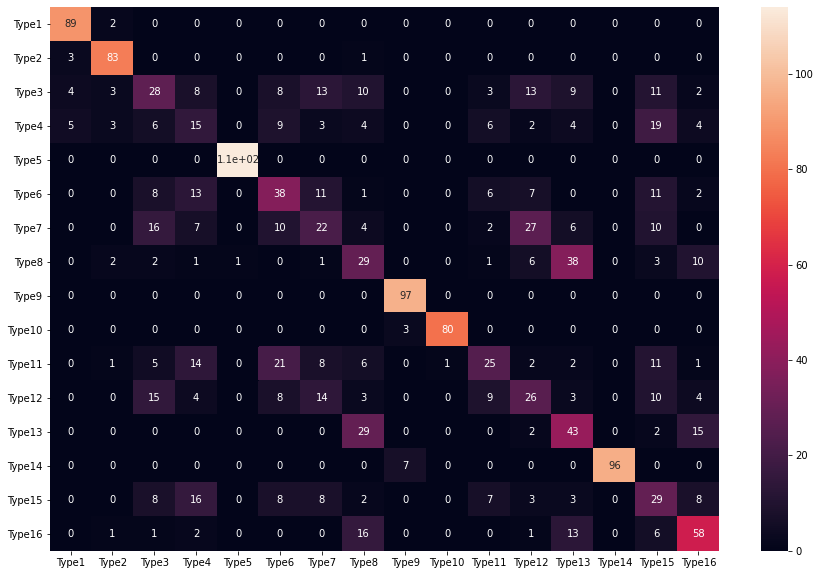

In [32]:
to_cm = pd.DataFrame(array, index = [i for i in ["Type"+str(i) for i in range(1,17)]],
                  columns = ["Type"+str(i) for i in range(1,17)])
plt.figure(figsize = (15,10))
sn.heatmap(to_cm, annot=True)

In [ ]:
model.save('model.h5')